# Aclaracion

Este notebook ira dedicado a la instanciacion y entrenamiento de modelos de clasificacion para cada uno de los datasets normalizados que hemos definido anteriormente.

**Los modelos entrenados seran almacenados en el directorio 'class_models/'**.


En este notebook, se llevaran a cabo entonces varios entrenamientos diferentes, teniendo en cuenta los diferentes conjuntos de datos procesados, definidos para este fin. Posterior a la fase de entrenamiento y validacion de los modelos, se llevara a cabo un proceso de explicacion acerca de los resultados obtenidos, y se detallaran los motivos por los que existen dichas diferencias en el rendimiento final de los modelos.

# Importacion de librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Libreria y metodo para guardar los modelos entrenados
from joblib import dump

# DATASET COMPLETO (Sin eleccion previa de covariables predictoras).

## Dataset Normalizado COMPLETO (Fechas normalizadas)

In [2]:
dataset_normalized_all_complete__route = '../normalized_datasets/no_cares_corr/normalized_all/dataset_norm.csv'
dataset_normalized_all_complete_df = pd.read_csv(dataset_normalized_all_complete__route)

dataset_normalized_all_complete_df.head(10)

,Unnamed: 0,Day,Month,Year,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Holiday,Functioning Day
0,0,-1.673503,1.587648,-3.282407,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
1,1,-1.673503,1.587648,-3.282407,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
2,2,-1.673503,1.587648,-3.282407,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
3,3,-1.673503,1.587648,-3.282407,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
4,4,-1.673503,1.587648,-3.282407,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
5,5,-1.673503,1.587648,-3.282407,-0.937425,-0.939010,-1.614425,-1.042483,-0.217043,0.925871,-1.743834,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
6,6,-1.673503,1.587648,-3.282407,-0.811836,-0.794547,-1.631169,-1.140709,-0.410048,0.925871,-1.805091,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
7,7,-1.673503,1.587648,-3.282407,-0.379251,-0.650084,-1.698148,-0.993370,-0.796059,0.925871,-1.789777,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
8,8,-1.673503,1.587648,-3.282407,0.349475,-0.505621,-1.714893,-1.042483,-0.603054,0.925871,-1.828063,-0.643620,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
9,9,-1.673503,1.587648,-3.282407,-0.332737,-0.361158,-1.622797,-1.533612,-1.182069,0.807502,-2.027150,-0.390367,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0


In [3]:
# Elimino la primera columna del dataframe
dataset_normalized_all_complete_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
dataset_normalized_all_complete_df.head(10)

,Day,Month,Year,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Holiday,Functioning Day
0,-1.673503,1.587648,-3.282407,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
1,-1.673503,1.587648,-3.282407,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
2,-1.673503,1.587648,-3.282407,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
3,-1.673503,1.587648,-3.282407,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
4,-1.673503,1.587648,-3.282407,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
5,-1.673503,1.587648,-3.282407,-0.937425,-0.939010,-1.614425,-1.042483,-0.217043,0.925871,-1.743834,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
6,-1.673503,1.587648,-3.282407,-0.811836,-0.794547,-1.631169,-1.140709,-0.410048,0.925871,-1.805091,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
7,-1.673503,1.587648,-3.282407,-0.379251,-0.650084,-1.698148,-0.993370,-0.796059,0.925871,-1.789777,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
8,-1.673503,1.587648,-3.282407,0.349475,-0.505621,-1.714893,-1.042483,-0.603054,0.925871,-1.828063,-0.643620,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
9,-1.673503,1.587648,-3.282407,-0.332737,-0.361158,-1.622797,-1.533612,-1.182069,0.807502,-2.027150,-0.390367,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0


In [5]:
# Defino mi matriz de caracteristicas X, y mi matriz de etiquetas, y
X = dataset_normalized_all_complete_df.drop(columns = ['Functioning Day'])
y = dataset_normalized_all_complete_df['Functioning Day']

In [6]:
# Genero los subsets de entrenamiento y validacion, aplicando un factor de randomizacion en la division

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [7]:
X_train.shape

(7008, 17)

In [8]:
X_test.shape

(1752, 17)

In [9]:
y_train.shape

(7008,)

In [10]:
y_test.shape

(1752,)

In [11]:
# Instancio el modelo clasificador de RandomForest
model = RandomForestClassifier()

In [12]:
# Aplico validacion cruzada con el conjunto de datos de entrenamiento
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Exactitud en cada fold:", scores)
print("Exactitud media:", scores.mean())

Exactitud en cada fold: [1. 1. 1. 1. 1.]
Exactitud media: 1.0


In [13]:
# Entreno el model con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Muestro el coeficiente R2 en relacion con el conjunto de prueba
model.score(X_test, y_test)

1.0

In [14]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('El modelo entrenado logra un coeficiente de Exactitud de {} para el conjunto de prueba. DATASET COMPLETO Y NORMALIZADO.'.format(accuracy))

El modelo entrenado logra un coeficiente de Exactitud de 1.0 para el conjunto de prueba. DATASET COMPLETO Y NORMALIZADO.


In [15]:
# Represento una matriz de confusion y un cuadro de clasificacion, que interpreten los resultados obtenidos
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_completo_all = confusion_matrix(y_test, y_pred)
print(conf_matrix_completo_all)


class_report = classification_report(y_test, y_pred)
print(class_report)

[[1694    0]
 [   0   58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00        58

    accuracy                           1.00      1752
   macro avg       1.00      1.00      1.00      1752
weighted avg       1.00      1.00      1.00      1752



In [16]:
# Guardo el modelo final
import os
saving_model__route = '../trained_models/no_cares_corr/normalized_all/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'model.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Dataset Normalizado Completo (Fechas NO normalizadas)

In [17]:
dataset_normalized_all_complete__route = '../normalized_datasets/no_cares_corr/normalized_without_date/dataset_norm_without_date.csv'
dataset_normalized_all_complete_without_date_df = pd.read_csv(dataset_normalized_all_complete__route)

dataset_normalized_all_complete_without_date_df.head(10)

,Unnamed: 0,Day,Month,Year,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Holiday,Functioning Day
0,0,1.0,12.0,2017.0,-0.698650,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
1,1,1.0,12.0,2017.0,-0.776175,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
2,2,1.0,12.0,2017.0,-0.824240,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
3,3,1.0,12.0,2017.0,-0.926571,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
4,4,1.0,12.0,2017.0,-0.971535,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
5,5,1.0,12.0,2017.0,-0.937425,-0.939010,-1.614425,-1.042483,-0.217043,0.925871,-1.743834,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
6,6,1.0,12.0,2017.0,-0.811836,-0.794547,-1.631169,-1.140709,-0.410048,0.925871,-1.805091,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
7,7,1.0,12.0,2017.0,-0.379251,-0.650084,-1.698148,-0.993370,-0.796059,0.925871,-1.789777,-0.655132,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
8,8,1.0,12.0,2017.0,0.349475,-0.505621,-1.714893,-1.042483,-0.603054,0.925871,-1.828063,-0.643620,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0
9,9,1.0,12.0,2017.0,-0.332737,-0.361158,-1.622797,-1.533612,-1.182069,0.807502,-2.027150,-0.390367,-0.1318,-0.171891,-0.576296,-0.580514,-0.580514,-0.227757,0


In [18]:
dataset_normalized_all_complete_without_date_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [19]:
# Defino mi matriz de caracteristicas X, y mi matriz de etiquetas, y
X = dataset_normalized_all_complete_without_date_df.drop(columns = ['Functioning Day'])
y = dataset_normalized_all_complete_without_date_df['Functioning Day']

In [20]:
# Genero los subsets de entrenamiento y validacion, aplicando un factor de randomizacion en la division

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [21]:
# Instancio el modelo clasificador de RandomForest
model = RandomForestClassifier()

In [22]:
# Aplico validacion cruzada con el conjunto de datos de entrenamiento
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Exactitud en cada fold:", scores)
print("Exactitud media:", scores.mean())

Exactitud en cada fold: [1. 1. 1. 1. 1.]
Exactitud media: 1.0


In [23]:
# Entreno el model con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Muestro el coeficiente R2 en relacion con el conjunto de prueba
model.score(X_test, y_test)

1.0

In [24]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('El modelo entrenado logra un coeficiente de Exactitud de {} para el conjunto de prueba. DATASET COMPLETO Y NORMALIZADO (Fechas no normalizadas).'.format(accuracy))

El modelo entrenado logra un coeficiente de Exactitud de 1.0 para el conjunto de prueba. DATASET COMPLETO Y NORMALIZADO (Fechas no normalizadas).


In [25]:
# Represento una matriz de confusion y un cuadro de clasificacion, que interpreten los resultados obtenidos
conf_matrix_completo_without_dates = confusion_matrix(y_test, y_pred)
print(conf_matrix_completo_without_dates)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[1694    0]
 [   0   58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00        58

    accuracy                           1.00      1752
   macro avg       1.00      1.00      1.00      1752
weighted avg       1.00      1.00      1.00      1752



In [26]:
# Guardo el modelo final
import os
saving_model__route = '../trained_models/no_cares_corr/normalized_without_date/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'model.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


# DATASET LIMITADO (Eleccion previa de covariables predictoras).

## Dataset Limitado Normalizado (Fechas normalizadas)

In [27]:
dataset_normalized__route = '../normalized_datasets/cares_corr/normalized_all/dataset_norm.csv'
dataset_normalized_df = pd.read_csv(dataset_normalized__route)

dataset_normalized_df.head(10)

,Unnamed: 0,Month,Year,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Autumn,Holiday,Functioning Day
0,0,1.587648,-3.282407,-1.513957,-1.042483,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
1,1,1.587648,-3.282407,-1.539074,-0.993370,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
2,2,1.587648,-3.282407,-1.580936,-0.944257,0.925871,-1.667262,-0.655132,-0.576296,-0.227757,0
3,3,1.587648,-3.282407,-1.597680,-0.895144,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
4,4,1.587648,-3.282407,-1.580936,-1.091596,0.925871,-1.736177,-0.655132,-0.576296,-0.227757,0
5,5,1.587648,-3.282407,-1.614425,-1.042483,0.925871,-1.743834,-0.655132,-0.576296,-0.227757,0
6,6,1.587648,-3.282407,-1.631169,-1.140709,0.925871,-1.805091,-0.655132,-0.576296,-0.227757,0
7,7,1.587648,-3.282407,-1.698148,-0.993370,0.925871,-1.789777,-0.655132,-0.576296,-0.227757,0
8,8,1.587648,-3.282407,-1.714893,-1.042483,0.925871,-1.828063,-0.643620,-0.576296,-0.227757,0
9,9,1.587648,-3.282407,-1.622797,-1.533612,0.807502,-2.027150,-0.390367,-0.576296,-0.227757,0


In [28]:
dataset_normalized_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [29]:
# Defino mi matriz de caracteristicas X, y mi matriz de etiquetas, y
X = dataset_normalized_df.drop(columns = ['Functioning Day'])
y = dataset_normalized_df['Functioning Day']

In [30]:
# Genero los subsets de entrenamiento y validacion, aplicando un factor de randomizacion en la division

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
# Instancio el modelo clasificador de RandomForest
model = RandomForestClassifier()

In [32]:
# Aplico validacion cruzada con el conjunto de datos de entrenamiento
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Exactitud en cada fold:", scores)
print("Exactitud media:", scores.mean())

Exactitud en cada fold: [0.97289586 0.97075606 0.97717546 0.97073519 0.97144897]
Exactitud media: 0.9726023087238481


In [33]:
# Entreno el model con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Muestro el coeficiente R2 en relacion con el conjunto de prueba
model.score(X_test, y_test)

0.9726027397260274

In [34]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('El modelo entrenado logra un coeficiente de Exactitud de {} para el conjunto de prueba. DATASET LIMITADO Y NORMALIZADO (Fechas normalizadas).'.format(round(accuracy, 2)))

El modelo entrenado logra un coeficiente de Exactitud de 0.97 para el conjunto de prueba. DATASET LIMITADO Y NORMALIZADO (Fechas normalizadas).


In [35]:
# Represento una matriz de confusion y un cuadro de clasificacion, que interpreten los resultados obtenidos
conf_matrix_limited = confusion_matrix(y_test, y_pred)
print(conf_matrix_limited)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[1683   11]
 [  37   21]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1694
           1       0.66      0.36      0.47        58

    accuracy                           0.97      1752
   macro avg       0.82      0.68      0.73      1752
weighted avg       0.97      0.97      0.97      1752



In [36]:
# Guardo el modelo final
import os
saving_model__route = '../trained_models/cares_corr/normalized_all/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'model.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Dataset Limitado (Fechas no normalizadas)

In [37]:
dataset_normalized_without_date__route = '../normalized_datasets/cares_corr/normalized_without_date/dataset_norm_without_date.csv'
dataset_normalized_without_date_df = pd.read_csv(dataset_normalized_without_date__route)

dataset_normalized_without_date_df.head(10)

,Unnamed: 0,Month,Year,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Autumn,Holiday,Functioning Day
0,0,12.0,2017.0,-1.513957,-1.042483,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
1,1,12.0,2017.0,-1.539074,-0.993370,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
2,2,12.0,2017.0,-1.580936,-0.944257,0.925871,-1.667262,-0.655132,-0.576296,-0.227757,0
3,3,12.0,2017.0,-1.597680,-0.895144,0.925871,-1.659605,-0.655132,-0.576296,-0.227757,0
4,4,12.0,2017.0,-1.580936,-1.091596,0.925871,-1.736177,-0.655132,-0.576296,-0.227757,0
5,5,12.0,2017.0,-1.614425,-1.042483,0.925871,-1.743834,-0.655132,-0.576296,-0.227757,0
6,6,12.0,2017.0,-1.631169,-1.140709,0.925871,-1.805091,-0.655132,-0.576296,-0.227757,0
7,7,12.0,2017.0,-1.698148,-0.993370,0.925871,-1.789777,-0.655132,-0.576296,-0.227757,0
8,8,12.0,2017.0,-1.714893,-1.042483,0.925871,-1.828063,-0.643620,-0.576296,-0.227757,0
9,9,12.0,2017.0,-1.622797,-1.533612,0.807502,-2.027150,-0.390367,-0.576296,-0.227757,0


In [38]:
dataset_normalized_without_date_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [39]:
# Defino mi matriz de caracteristicas X, y mi matriz de etiquetas, y
X = dataset_normalized_without_date_df.drop(columns = ['Functioning Day'])
y = dataset_normalized_without_date_df['Functioning Day']

In [40]:
# Genero los subsets de entrenamiento y validacion, aplicando un factor de randomizacion en la division

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [41]:
# Instancio el modelo clasificador de RandomForest
model = RandomForestClassifier()

In [42]:
# Aplico validacion cruzada con el conjunto de datos de entrenamiento
scores = cross_val_score(model, X_train, y_train, cv=5)

print("Exactitud en cada fold:", scores)
print("Exactitud media:", scores.mean())

Exactitud en cada fold: [0.97503566 0.97289586 0.9743224  0.97144897 0.97216274]
Exactitud media: 0.9731731257783058


In [43]:
# Entreno el model con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Muestro el coeficiente R2 en relacion con el conjunto de prueba
model.score(X_test, y_test)

0.9726027397260274

In [44]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('El modelo entrenado logra un coeficiente de Exactitud de {} para el conjunto de prueba. DATASET LIMITADO Y NORMALIZADO (Fechas normalizadas).'.format(round(accuracy, 2)))

El modelo entrenado logra un coeficiente de Exactitud de 0.97 para el conjunto de prueba. DATASET LIMITADO Y NORMALIZADO (Fechas normalizadas).


In [45]:
# Represento una matriz de confusion y un cuadro de clasificacion, que interpreten los resultados obtenidos
conf_matrix_limited_without_dates = confusion_matrix(y_test, y_pred)
print(conf_matrix_limited_without_dates)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[1685    9]
 [  39   19]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1694
           1       0.68      0.33      0.44        58

    accuracy                           0.97      1752
   macro avg       0.83      0.66      0.71      1752
weighted avg       0.97      0.97      0.97      1752



In [46]:
# Guardo el modelo final
import os
saving_model__route = '../trained_models/cares_corr/normalized_without_date/'

if not os.path.exists(saving_model__route):
    os.mkdir(saving_model__route)
    
dump(model, os.path.join(saving_model__route, 'model.joblib'))
print('Modelo guardado con exito!')

Modelo guardado con exito!


## Enfrento los resultados de los diferentes modelos

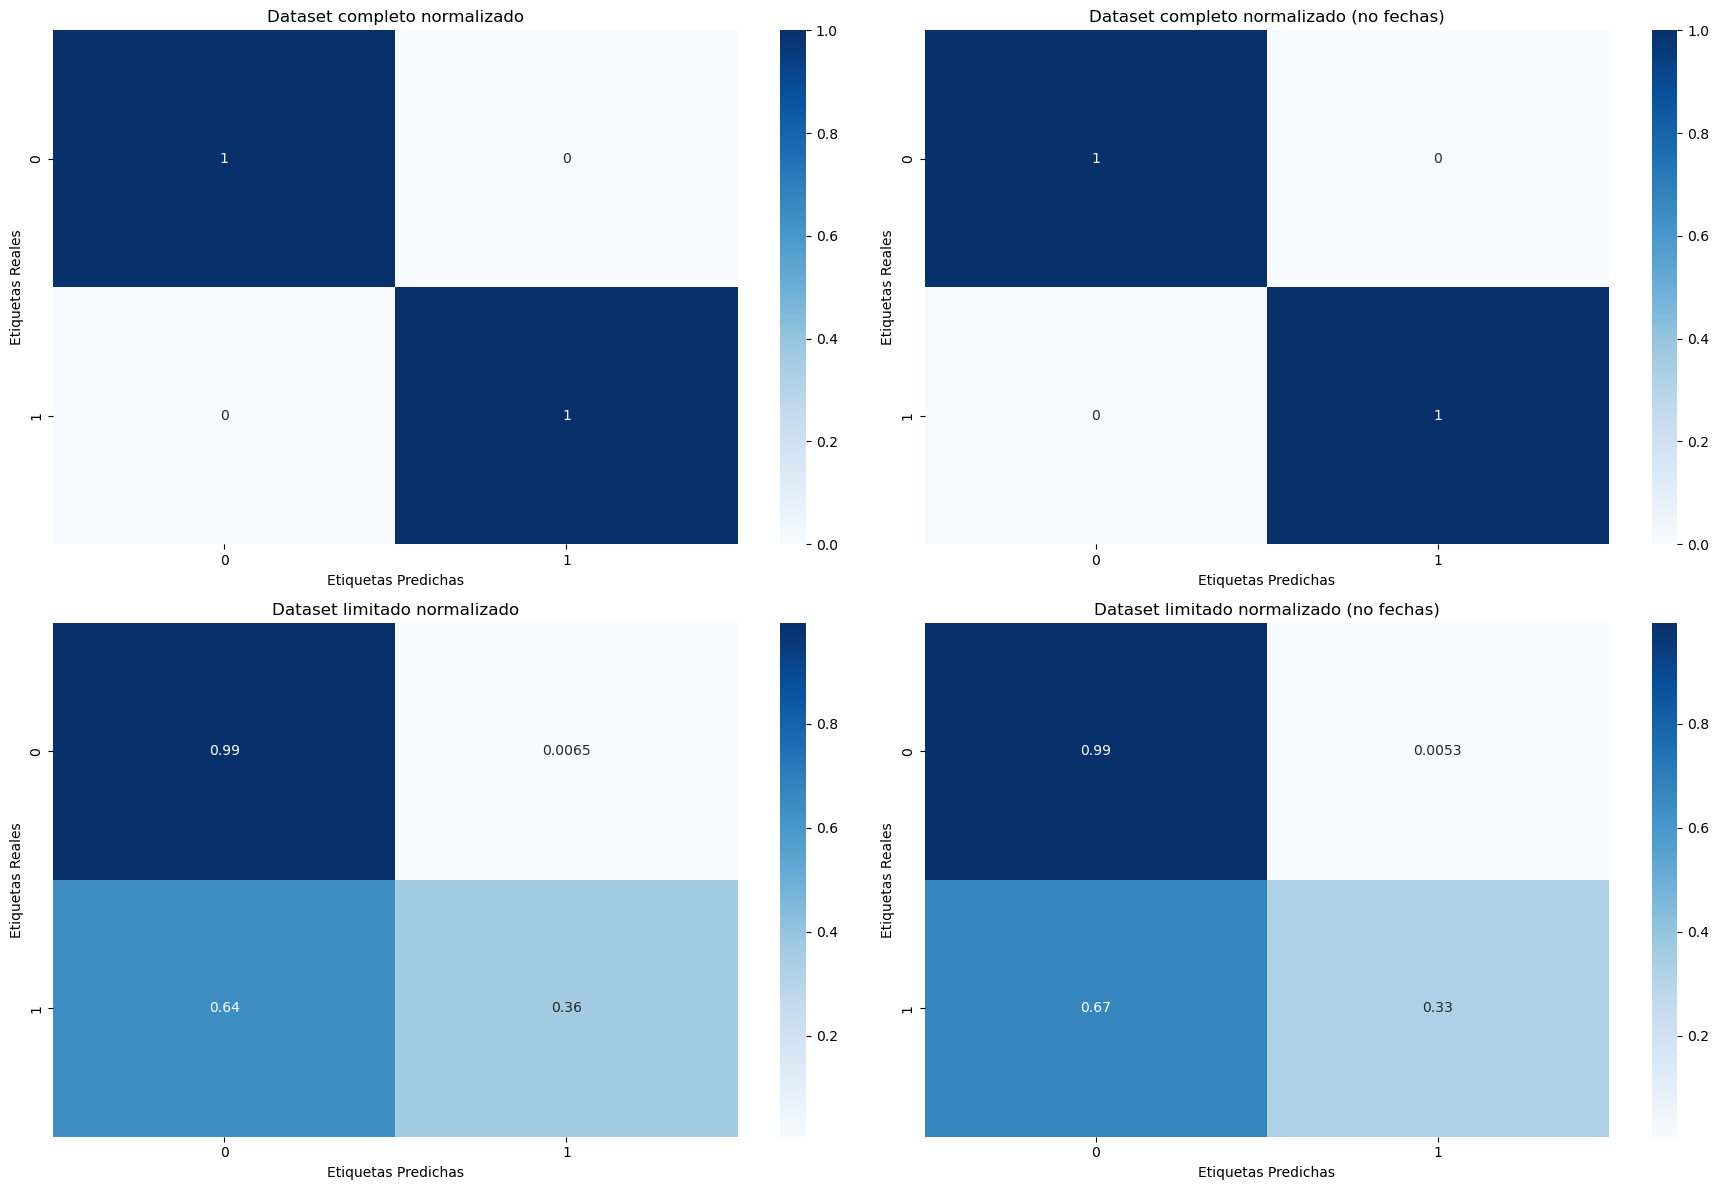

In [50]:
import seaborn as sns

cm1 = conf_matrix_completo_all
cm2 = conf_matrix_completo_without_dates
cm3 = conf_matrix_limited
cm4 = conf_matrix_limited_without_dates

# Normalizo las matrices de confusión para obtener frecuencias en lugar de conteos
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]
cm4 = cm4.astype('float') / cm4.sum(axis=1)[:, np.newaxis]

# Grafico las matrices de confusión
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

sns.heatmap(cm1, annot=True, ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title('Dataset completo normalizado')
ax[0, 0].set_ylabel('Etiquetas Reales')
ax[0, 0].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm2, annot=True, ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('Dataset completo normalizado (no fechas)')
ax[0, 1].set_ylabel('Etiquetas Reales')
ax[0, 1].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm3, annot=True, ax=ax[1, 0], cmap='Blues')
ax[1, 0].set_title('Dataset limitado normalizado')
ax[1, 0].set_ylabel('Etiquetas Reales')
ax[1, 0].set_xlabel('Etiquetas Predichas')

sns.heatmap(cm4, annot=True, ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title('Dataset limitado normalizado (no fechas)')
ax[1, 1].set_ylabel('Etiquetas Reales')
ax[1, 1].set_xlabel('Etiquetas Predichas')

plt.tight_layout()
plt.show()